# How can streaming platforms recommend you movies?

**by Teresa Mondria Terol - tm3370**

Who chooses what we end up watching on Netflix, Netflix or ourselves?How do recommendation systems work? Streaming platform's algorithms are black boxes, so there is no proper or public way to actually discover it, but we can try to come up with a simple recommender system in Python to get a better understanding on how does it work.  

For this project, I have done a deep dive into how recommendation systems work in theory, which mathematical foundations are they based on (I'm a Maths+Journalism graduate, so that previous knowledge in algebra and calculos was really useful), and which techniques are normally used to build simple recommenders from scratch. 

I got the data from The Movie Database and MovieLense, two extensive databases of movies used for educational purposes. The first one has a more robust system of rating, which is better for some types of social recommendations, as well as text summaries of each movie, which will be used in content-based recommendations. The second database has information about default users that will enable us to try a collaborative-based recommender approach. 

Through the whole project, I will be explaining how the code works, but also the theory behind it, since it is really important to understand the underlying mechanisms in order to be able to choose the right recommender for our system, be it a platform, an e-commerce, or a personalized service. So this has implications in business we must identify. But trying it out with movies seems more fun. 

The data can be found here: 

https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata

https://grouplens.org/datasets/movielens/100k/


## Upload the dataset and basic libraries

In [1]:
import pandas as pd

In [2]:
df_films=pd.read_csv('data/films.csv')
df_productions=pd.read_csv('data/productions.csv')

Let's join the two dataframes in one by looking at a common column. 

In [3]:
df_films.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
df_productions.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


The column is the same one but named differently, so we can rename the column in one of the dataframes to match the other one. 

In [5]:
df_films.rename(columns={'id': 'movie_id'}, inplace=True)

Now, we can merge both on the column movie_id.

In [6]:
df_films=df_films.merge(df_productions, on = 'movie_id')

Let's take a look to see if it was correctly done by looking at the head of the df. 

In [7]:
df_films.head()

,budget,genres,homepage,movie_id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


The title column got repeated, so let's drop one of them and rename the other one to 'title'

df_films = df_films.drop(columns='title_y')

In [8]:
df_films.rename(columns={'title_x': 'title'}, inplace=True)

## 1. Score ranking: Top10s and more

The most basic way of recommending movies is with the Top lists, which account for some kind of evaluation or votes and assume people like what the majority of people like as well. 

This dataframe has a vote_average and a vote_count columns. You could easily sort the TOP RATED movies and the MOST POPULAR movies based in the average score and the average vote count, respectively, to understand how Netflix creates the TOP10 movie rank, for example. I just need to know the titles, so I'll sort the dataframe descendingly in terms of vote average and vote count, select the top ten and save the title information on a separate variable. 

In [9]:
top10rated = df_films.sort_values(by='vote_average', ascending=False).head(10).title

In [10]:
top10popular = df_films.sort_values(by='vote_count', ascending=False).head(10).title

Let's visualize both to see the rankings more clearly. We will need to extract the titles and votes data, sort the extracted data again and plot it with the matplotlib library following a simple style. 

In [11]:
top10rated_values = df_films.loc[df_films['title'].isin(top10rated), ['title', 'vote_average']]
top10popular_values = df_films.loc[df_films['title'].isin(top10popular), ['title', 'vote_count']]

In [12]:
top10rated_values = top10rated_values.set_index('title').loc[top10rated].reset_index()
top10popular_values = top10popular_values.set_index('title').loc[top10popular].reset_index()

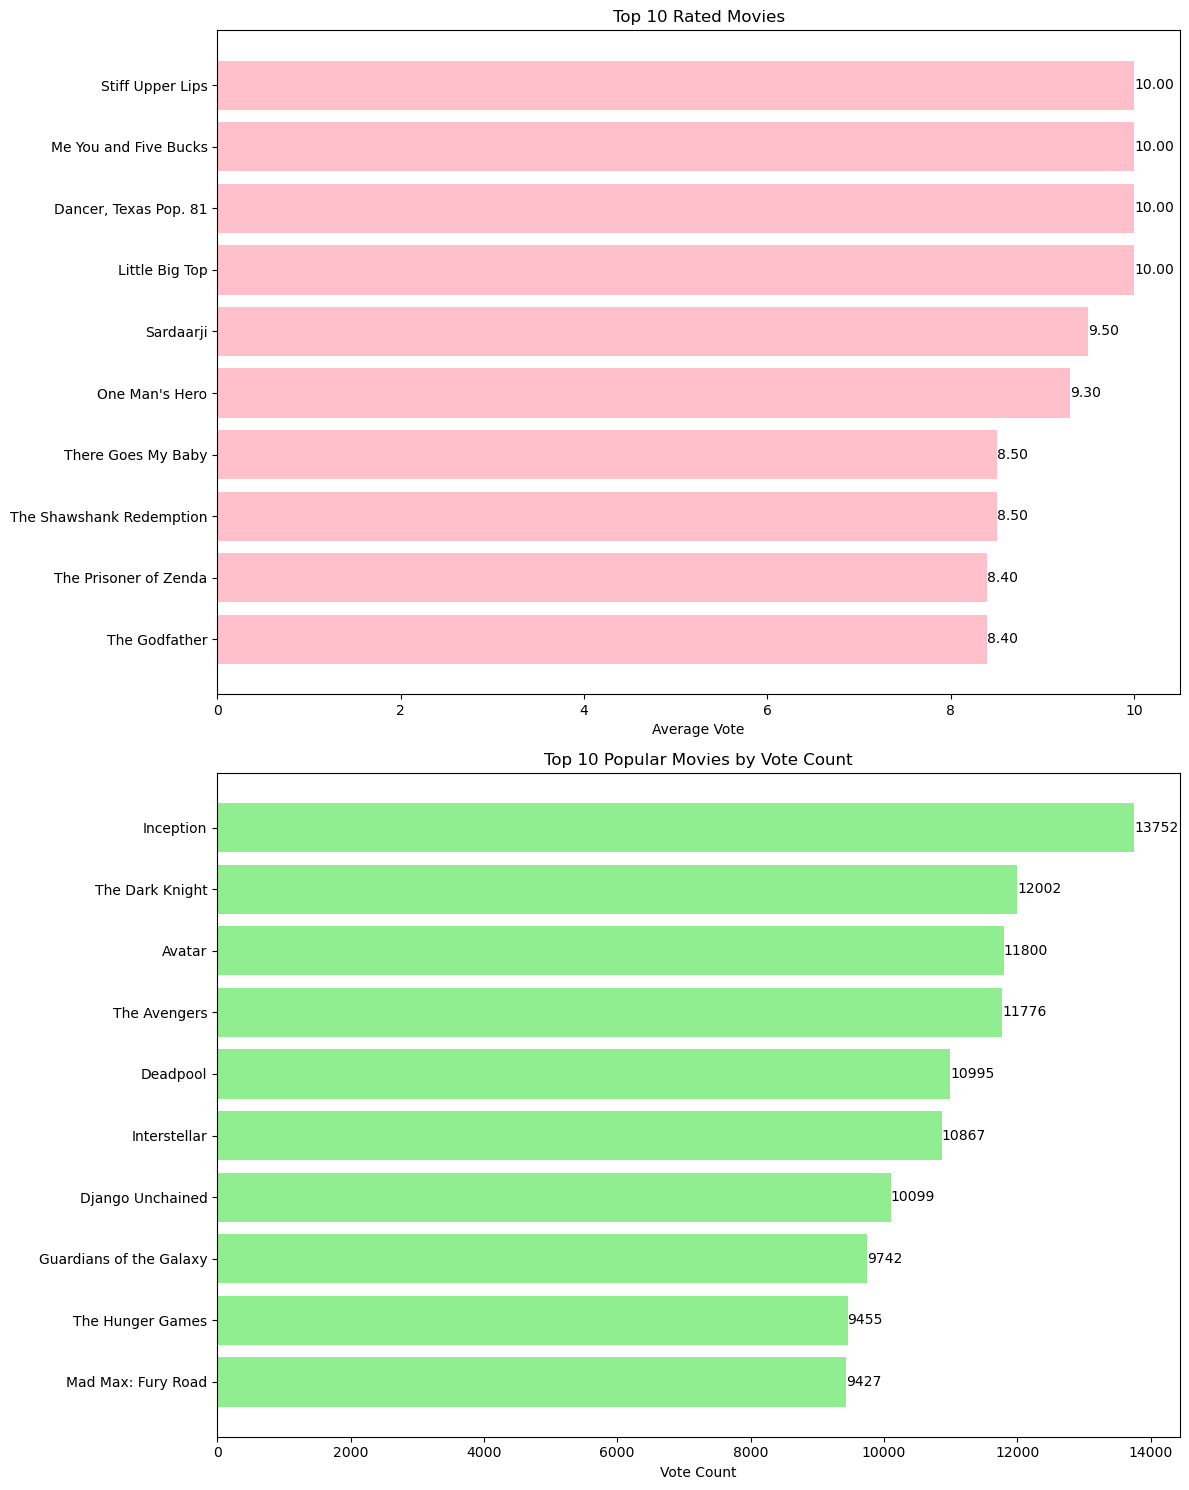

In [13]:
import matplotlib
import matplotlib.pyplot as plt

# Set up the figure and axes
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 15))

# Plotting top10rated
axes[0].barh(top10rated_values['title'][::-1], top10rated_values['vote_average'][::-1], color='pink')
axes[0].set_title('Top 10 Rated Movies')
axes[0].set_xlabel('Average Vote')
for index, value in enumerate(top10rated_values['vote_average'][::-1]):
    axes[0].text(value, index, f'{value:.2f}', va='center')

# Plotting top10popular
axes[1].barh(top10popular_values['title'][::-1], top10popular_values['vote_count'][::-1], color='lightgreen')
axes[1].set_title('Top 10 Popular Movies by Vote Count')
axes[1].set_xlabel('Vote Count')
for index, value in enumerate(top10popular_values['vote_count'][::-1]):
    axes[1].text(value, index, str(value), va='center')

plt.tight_layout()
plt.show()


But imagine you have a really niche film, you're friends adore you and rate your film the highest, giving you a full score in The Movie Database. But only your friends have watched it. On the other hand, Inception, one of the top popular films has been rated thousands of times, so the distribution of votes gives it a lower rate compared to your film. That is not really fair, so we can give each vote_count a weight to balance the ratio of vote_average and vote_counts. 

This score is usually computed like this

Weighted Score = ((vote_count/(vote_count + min_vote_requirement)) * vote_average) + ((min_vote_requirement/(min_vote_requirement+vote_count)* overall_average)

We have two of the variables, the other two can be easily calculated. 

The overall_average is just the mean of every average in the dataframe. The min_vote_requirement is the minimum vote_count that we consider is enough to be part of the rankings, for example, every movie that has a vote_count higher than the lower 30% on the list, to erase the last part of the tail. 

In [14]:
overall_average= df_films['vote_average'].mean()
overall_average

6.092171559442016

In [15]:
min_vote_requirement= df_films['vote_count'].quantile(0.3)
min_vote_requirement

76.0

Having at least 76 votes seems like a good limit in order to qualify, so let's continue with this condition and see how many movies qualify with a logic requirement.

In [16]:
qualified_films = df_films.copy().loc[df_films['vote_count'] >= min_vote_requirement]

In [17]:
qualified_films.shape

(3363, 23)

We have 3363 movies that qualify! That is a pretty good amount for our recommender system to work with :) 

In order to rank the movies by this weighted score, we need to build a new column that computes that formula, defining every variable with one letter to better work with the formula, and making it return the calculated formula as a result. Then, we will add a new column "score" aplying this result to each movie.

In [18]:
def weighted_score (x, m=min_vote_requirement, C=overall_average):
    v= x['vote_count']
    R = x['vote_average']
    return (v/(v+m)*R)+(m/(m+v)*C)

In [19]:
qualified_films['score']=qualified_films.apply(weighted_score, axis=1)

Now we can sort all the qualifying movies to see which ones won the weighted score ranking: 

In [20]:
qualified_films = qualified_films.sort_values('score', ascending=False)
qualified_films[['title', 'vote_count', 'vote_average', 'score']].head(10)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.477902
3337,The Godfather,5893,8.4,8.370616
662,Fight Club,9413,8.3,8.282317
3232,Pulp Fiction,8428,8.3,8.280269
1818,Schindler's List,4329,8.3,8.261908
3865,Whiplash,4254,8.3,8.261248
2294,Spirited Away,3840,8.3,8.257151
2731,The Godfather: Part II,3338,8.3,8.250851
65,The Dark Knight,12002,8.2,8.186737
809,Forrest Gump,7927,8.2,8.179983


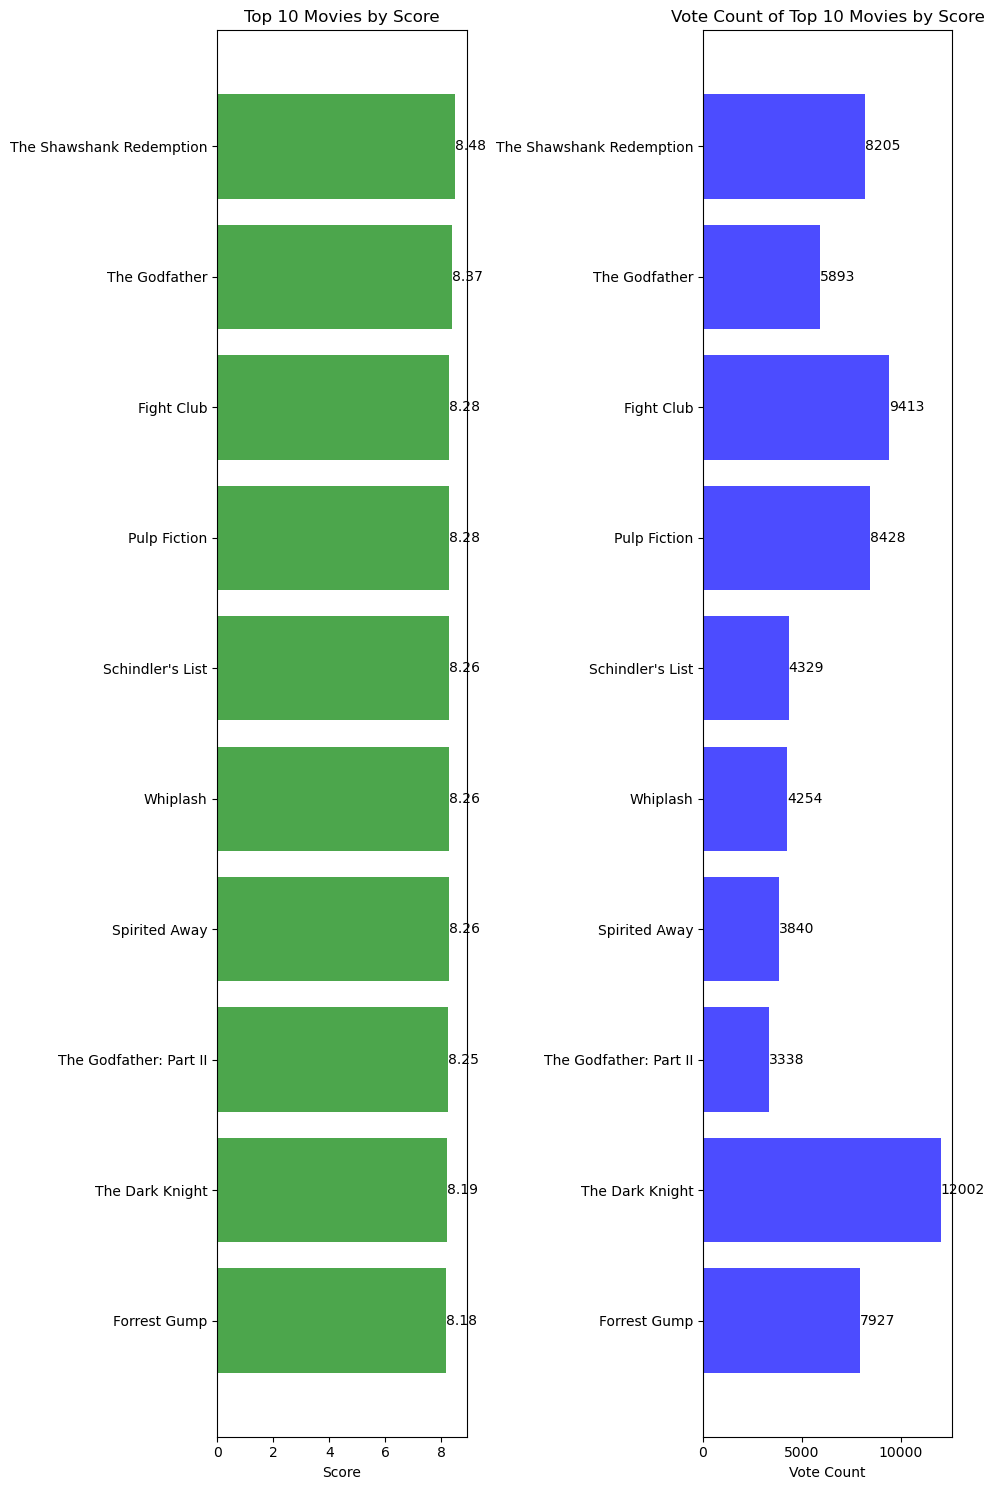

In [21]:
top10_scored_films = qualified_films.head(10)

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 15))

# Plotting score
axes[0].barh(top10_scored_films['title'][::-1], top10_scored_films['score'][::-1], color='green', alpha=0.7)
axes[0].set_title('Top 10 Movies by Score')
axes[0].set_xlabel('Score')
for index, value in enumerate(top10_scored_films['score'][::-1]):
    axes[0].text(value, index, f'{value:.2f}', va='center', color='black')

# Plotting vote_count
axes[1].barh(top10_scored_films['title'][::-1], top10_scored_films['vote_count'][::-1], color='blue', alpha=0.7)
axes[1].set_title('Vote Count of Top 10 Movies by Score')
axes[1].set_xlabel('Vote Count')
for index, value in enumerate(top10_scored_films['vote_count'][::-1]):
    axes[1].text(value, index, f'{value}', va='center', color='black')
    
# Adjust layout
plt.tight_layout()
plt.show()

You can clearly see that some older movies might have gotten less votes because watching them is a matter of intention and not a result in new movies marketing strategy, so the weighted score actually makes a difference

If we compare it to the top10popular, we can see that some in both, such as The Dark Knight, but many don't. Top10 movies in the weighted score ranking tend to be more "classic", and the top10popular, more "mainstream". Depending on the preferences of each user, one ranking can be prompted instead of the other, giving a better personalization system even in these kind of "social" or "general" recommendations. 


In [22]:
top10popular

96                   Inception
65             The Dark Knight
0                       Avatar
16                The Avengers
788                   Deadpool
95                Interstellar
287           Django Unchained
94     Guardians of the Galaxy
426           The Hunger Games
127         Mad Max: Fury Road
Name: title, dtype: object

There's actually this column called "popularity" that relates to an unknown variable about some sort of popularity evaluation, which we can plot as well to see if there are any differences with the top10popular variable we have defined with the number of votes in consideration. 

Text(0.5, 1.0, 'Popular Movies')

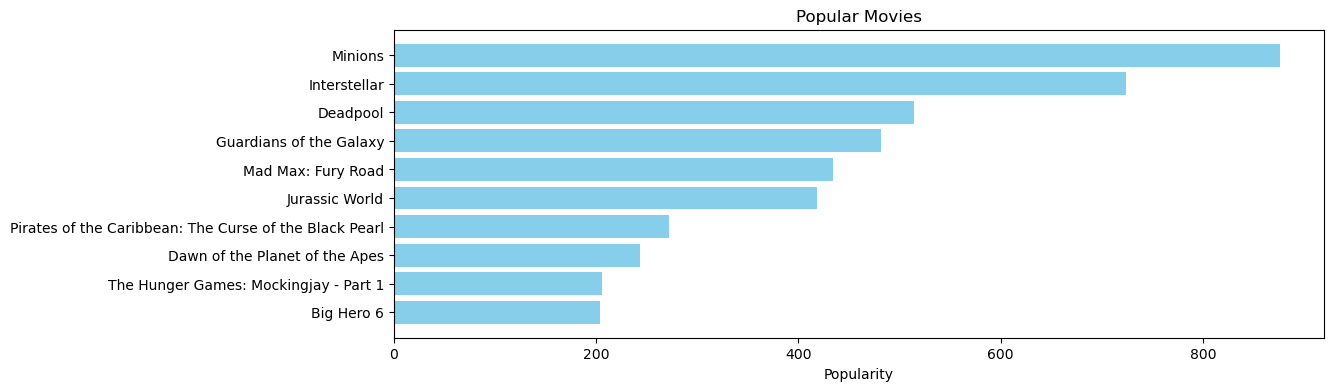

In [23]:
popular_films= df_films.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(popular_films['title'].head(10),popular_films['popularity'].head(10), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

Text(0.5, 1.0, 'Most voted movies')

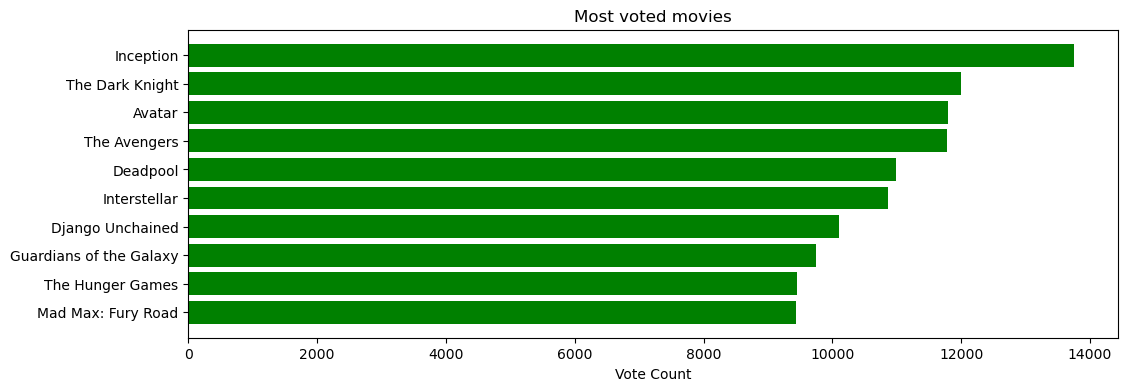

In [24]:
top_popular= df_films.sort_values('vote_count', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(top_popular['title'].head(10),top_popular['vote_count'].head(10), align='center',
        color='green')
plt.gca().invert_yaxis()
plt.xlabel("Vote Count")
plt.title("Most voted movies")

So there are some some differences, but they are pretty much mainstream movies. The "popularity" index includes more "children's movies" that may have a higher impact in the box office than vote counts, mainly because children do not normally vote (?). This shows that variables meaning are important to make business decisions about them, and assumptions around why choosing or computing a variable when recommending content to users is crucial. In this case, since I do not have enough knowledge about what the "popularity" variable accounts for, I would stick to the vote_count variable for this project. 

## 2. Content-based ranking: if you liked this, you'll like that

This kind of recommendation is normally used to recommend based on a metadata tagging system or genre-based recommendations. When it gets more complex, they rely on text-analysis to identify similarities between plotline or story summaries, but the underlying process is the same. 

i.e.: if I liked Lalaland, which is a "musical" and "romantic" movie in terms of genres, and I also liked "The Notebook", which is a "drama" and "romantic" movie, probably I will get a "romantic" genre movie recommended from this system. It could work the same way with way more specific tags such as "gang persecution", "unsolved mistery" o "XIX century historical drama", which could drive a user into a somewhat called eco-chamber, instead of prompting content that may be of the user's liking but is really different from what they normally seen. So it is not so diversity-friendly. 

Generally speaking, content-based recommendations are based on a user's preference for a particular category of content. 

In this case, to be able to do this kind of recommendation, we have to start with a more complex library to apply predictive modeling techniques. In this case, and in the majority of the cases I have studied for this project, Scikit-learn is the go-to library. 

I have seen the recommender systems built with to sublibraries, TfIdfVectorizer and CountVectorizer. CountVectorizer works better with names of the crew and simple words, and TfIdVectorizer works better with sentence-long summaries because it downweights really common words such as prepositions, articles and so on.

How each of them work is: a vector is created based on the whole content of one value (author name, genre category, summary text) and then a matrix is built with every vector in the dataframe. By calculating the cosine between to movie vectors, you can calculate or quantify their similarity (if two vectors are closer in terms of cosine, they are more similar). 

This similarity can be computed with other types of methods, again, making assumptions about what is our desired output, how does our user behave, how complex do we want our system to be... There is a whole world out there, starting with Scikit-learn. 

### How to code a content-based ranking

We will import the TfidVectorizer from Scikit-learn and define a vector object for every summary in the dataset. These summaries are stored in the column "overview", and are written in english. 

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import numpy as np

If we encounter an "overview" empty value, it could cause some trouble, so we should fill each one empty with at least a space, and then create the vectors. 

In [26]:
df_films['overview'] = df_films['overview'].fillna('')

In [27]:
summary_vectors = TfidfVectorizer(stop_words='english', max_features=5000)

Now we can build a matrix with all the vectors. 

In [28]:
tfidf_matrix = summary_vectors.fit_transform(df_films['overview'])
tfidf_matrix.shape

(4803, 5000)

This matrix means that out of +4800 movies, there are 5000 different terms used in the plot summaries to describe them all. The similarity among the +4800 movies will be related to how close are they in terms of the 5000 terms. In order to compute the similarity in cosine proximilty, we use the linear_kernel matrix as in algebra, for which we need a "squared" matrix. 

In [29]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim.shape

(4803, 4803)

Now we can create a function that recommends the movies based on the matrix similarity, in other words, content-based. We will need to retrieve the index of the movie that matches the title a person will provide, and then get the similarity scores with other movies, sort those out to obtain the highest level of similarity, get their movie indices and finally return the list of recommended movies.  

In [30]:
def recommend_movies(title, cosine_sim=cosine_sim, num_recommendations=10):   
    # Get the index of the movie that matches the title
    movie_index = df_films[df_films['title'] == title].index[0]

    # Get all the similarity scores with that movie
    similar_scores = list(enumerate(cosine_sim[movie_index]))

    # Sort the movies based on the similarity scores
    similar_scores = sorted(similar_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the top most similar movies
    similar_scores = similar_scores[1:num_recommendations + 1]

    # Get the movie indices
    movie_indices = [i[0] for i in similar_scores]

    # Return the top most similar movies
    return df_films['title'].iloc[movie_indices]


We can now test the recommendation system with my brother's favourite movie, "The Dark Knight Rises"

In [31]:
test_movie = "The Dark Knight Rises"
recommend_movies(test_movie)

299                              Batman Forever
65                              The Dark Knight
1359                                     Batman
428                              Batman Returns
2507                                  Slow Burn
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
210                              Batman & Robin
9            Batman v Superman: Dawn of Justice
1181                                        JFK
Name: title, dtype: object

I suppose he has seen all of them, because they are clearly similar, but that means the recommendation system (greatly content-based) is working!

Let's see which terms were used to retrieve these recommendations to understand a bit better how it worked. Again, we will extract the movie index, the frequencies of each term as an array, get the "feature names" or the most used ones

In [32]:
# Extract the index of "The Dark Knight Rises"
movie_idx = df_films[df_films['title'] == 'The Dark Knight Rises'].index[0]

# Extract the term frequency and weight for "TDKR"
term_weights = tfidf_matrix[movie_idx].toarray().flatten()

# Get the feature names (terms) from the vectorizers
feature_names = summary_vectors.get_feature_names_out()

# Create a DataFrame
term_df = pd.DataFrame({
    'Term': feature_names,
    'Term Weight (TF-IDF)': term_weights
})

# Sort the DataFrame based on Term Weight from TF-IDF and get top N terms
N = 20
top_terms_tfidf = term_df.sort_values(by='Term Weight (TF-IDF)', ascending=False).head(N)

top_terms_tfidf



,Term,Term Weight (TF-IDF)
1207,dent,0.353773
1936,gotham,0.335109
445,batman,0.335109
372,attorney,0.291919
3483,protect,0.233403
827,city,0.183968
3709,resurfaces,0.173339
3701,responsibility,0.173339
350,assumes,0.170265
2533,kyle,0.167555


gotham, batman, protect, resurfaces... it totally sounds like my brother's taste. 

## 3. Collaborative ranking: if someone like you liked this, you'll like this as well

This method relies on other users' behaviours to recommend items you have not seen, but has been watched by those who consume similar content to your preferences. It scores each user in similarity to your likings, somehow like the content-based approach but among users, and it ranks those that behave most similar. 

This can be computed either in terms of the rankings you give to movies (how did you like a movie) or in terms of watching history (what did you watch previously). 

This type of recommendations uses predictions to calculate the correlation between user's tastes. This correlation can be computed with similar methods as before, in order to "cluster neighboors". 

It can also be calculated in the reverse order: first you find similarity between two movies such as the content-based approach, and then you find similar users to recommend those similar movies. The math behind are pretty much the same. 

Now we will work with the MovieLense database, which has user data as well, to see how this would work. The data is divided into 23 dataframes, so we will read some of them, the 'user' (users info), 'data' (ratings) and 'item' (genres) dfs. The dfs do not have column titles so we will have to give some to them (they are indicated in the readme file, they are not madeup). 

In [33]:
u_columns = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
users = pd.read_csv('data/ml-100k/u.user', sep='|', names=u_columns,encoding='latin-1')

#Reading ratings file:
r_columns = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('data/ml-100k/u.data', sep='\t', names=r_columns,encoding='latin-1')

#Reading items file:
i_columns = ['movie_id', 'movie_title' ,'release_date','video_release_date', 'IMDb URL', 'unknown', 'Action', 'Adventure',
'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

items = pd.read_csv('data/ml-100k/u.item', sep='|', names=i_columns,encoding='latin-1')

In [34]:
users.head()


,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


Let's do a simple EDA to understand the user group in the database so we can understand the context of the recommendations as well.  

In [35]:
users.describe()

,user_id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


So we have a cohort of people from 7 to 73 years, with an average of 34, so the group can be considered diverse in terms of age. Let's plot it

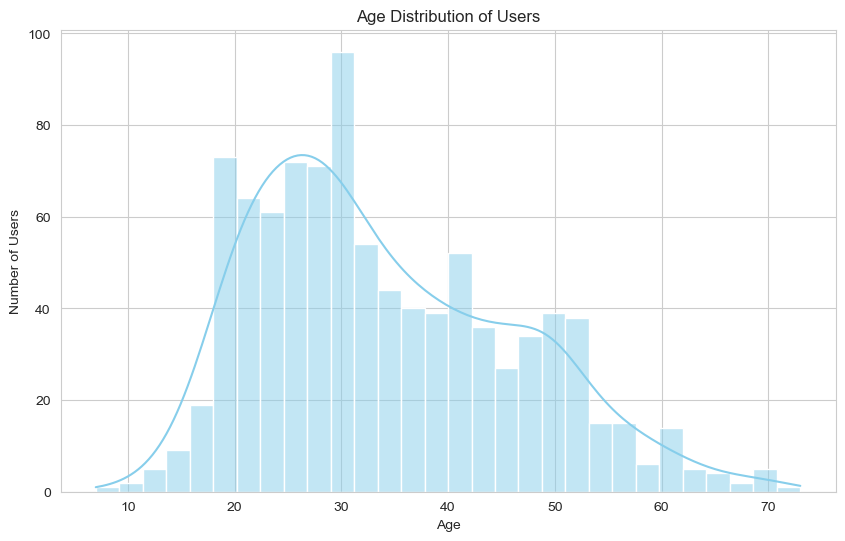

In [36]:
import seaborn as sns

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(users['age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution of Users')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.show()

Well... it is a little bit left-skewed, but movie platform users tend to be as well. Let's look at gender distribution now. 

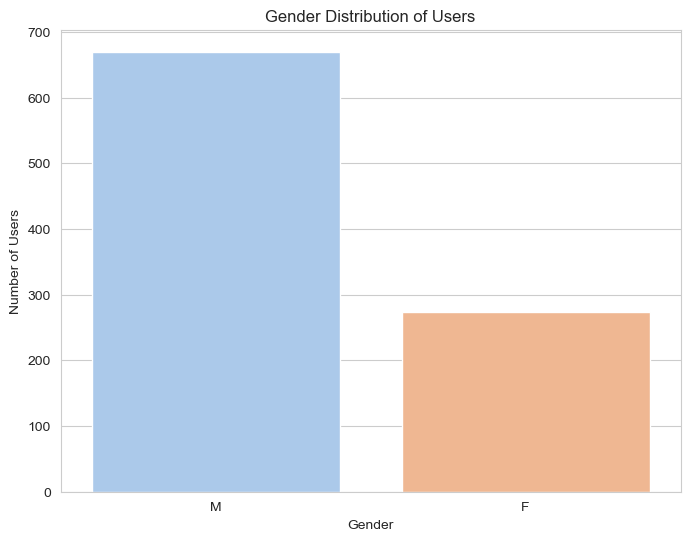

In [37]:
# Plot the gender distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=users, palette="pastel")
plt.title('Gender Distribution of Users')
plt.xlabel('Gender')
plt.ylabel('Number of Users')
plt.show()

Here we can find a bit of a misrepresentation, which should be taking into account when creating a recommendation system based on user-filtering, for example.

Let's examine the occupation, which gives us an overrepresentation of students, maybe because this dataframe was built by U. Minnesota. 

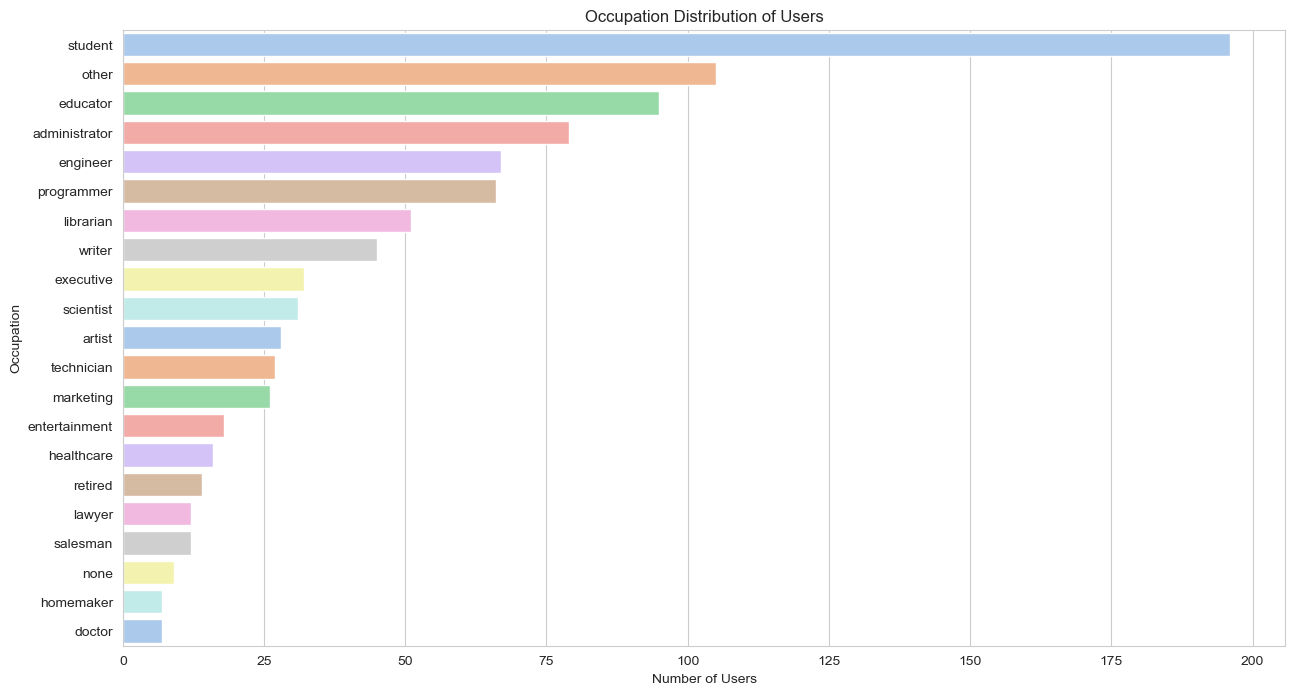

In [38]:

plt.figure(figsize=(15, 8))
sns.countplot(y='occupation', data=users, order=users['occupation'].value_counts().index, palette="pastel")
plt.title('Occupation Distribution of Users')
plt.xlabel('Number of Users')
plt.ylabel('Occupation')
plt.show()


We can even identify the average age of people in each occupation group, to cluster them. 

/var/folders/r4/6f7pdj5x0l9_s41fykfrscq40000gn/T/ipykernel_44173/1775930813.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.barplot(y='occupation', x='age', data=users, estimator=np.mean, ci=None, palette="pastel", order=users.groupby('occupation').mean()['age'].sort_values().index)
/var/folders/r4/6f7pdj5x0l9_s41fykfrscq40000gn/T/ipykernel_44173/1775930813.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(y='occupation', x='age', data=users, estimator=np.mean, ci=None, palette="pastel", order=users.groupby('occupation').mean()['age'].sort_values().index)


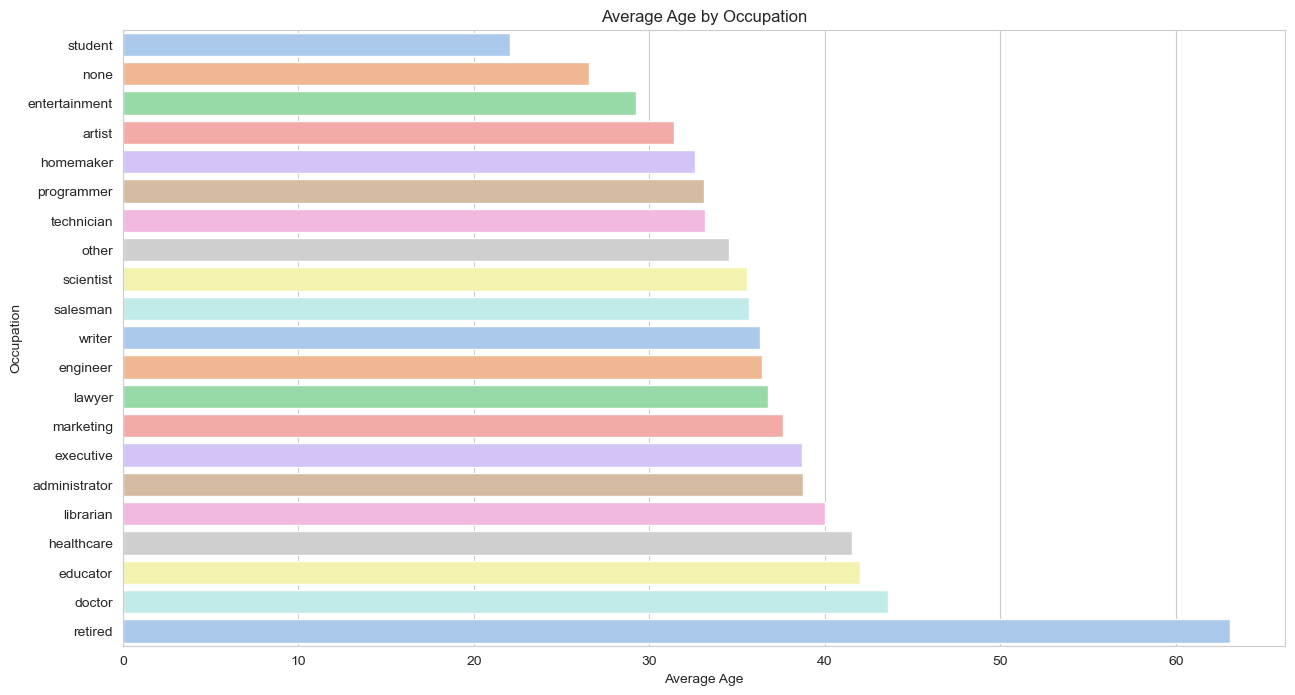

In [39]:
plt.figure(figsize=(15, 8))
sns.barplot(y='occupation', x='age', data=users, estimator=np.mean, ci=None, palette="pastel", order=users.groupby('occupation').mean()['age'].sort_values().index)
plt.title('Average Age by Occupation')
plt.xlabel('Average Age')
plt.ylabel('Occupation')
plt.show()

Now let's look at the ratings file, which has each user's rating for each movie, everything in id codes. 

In [40]:
ratings.head()


,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [41]:
ratings.shape #Number of total ratings among each user and each film

(100000, 4)

In [42]:
items.head()

,movie_id,movie_title,release_date,video_release_date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [43]:
items.shape #number of movies

(1682, 24)

Now that we have explored our data, let's build the third and last recommendation system

## How to code a collaborative-filtering rec system

In [44]:
n_users = ratings.user_id.unique().shape[0] #Number of users we will work with
n_items = ratings.movie_id.unique().shape[0] #Number of movies we will work with

We will need a matrix of every user and every movie to later combine with the individual ratings. 

In [45]:
data_matrix = np.zeros((n_users, n_items))
for line in ratings.itertuples():
    data_matrix[line[1]-1, line[2]-1] = line[3]

In this case we are going to use the pairwise_distances pack from Scikit-learn, using the cosine similarity as well, but in this case it allows us to work with multiple distances at the same time (users and movies)

In [46]:
from sklearn.metrics.pairwise import pairwise_distances 
user_similarity = pairwise_distances(data_matrix, metric='cosine')
movie_similarity = pairwise_distances(data_matrix.T, metric='cosine')

And now let's define the predictive model. We will need to calculate the mean of every rating a user has done, to later substract every rating for every movie to "center" the ratings around 0, which will be easier for the prediction model. 

The prediction for a user is then calculated as the weighted sum of the ratings around 0 (deviations) of all other users, where the weights are the similarity scores between users. Finally, it adds the mean rating again to give a final prediction for the user. 

In this case, you have to define an elif case, for those movies that do not have ratings or those users that have not rated any move (new cases), for which the prediction is calculated as the weighted sum of all ratings, where the weights are the similarity scores between the target item and other items.

The result pred is a matrix of the same shape as ratings, containing the predicted ratings for each user-item pair. This is conveniente since you can compute matrix operations such as the dot product, which makes it easier to find the similarity. 

In [47]:
def collaborative_filter_model (ratings, similarity, type='user'):
    
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1).reshape(-1,1)
        
        ratings_diff = (ratings - mean_user_rating)
        pred = mean_user_rating + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    
    return pred

In [48]:
user_prediction = collaborative_filter_model(data_matrix, user_similarity, type='user')
item_prediction = collaborative_filter_model(data_matrix, movie_similarity, type='item')

Let's select a random movie title to test this model

In [49]:
random_movie = items.sample(1).iloc[0]
random_movie_title = random_movie['movie_title']
random_movie_title

'Some Folks Call It a Sling Blade (1993)'

We got Back to the Future (1985). Pretty convenient for this project. Shall we? We will use the item_prediction matrix for this, and we need its movie id for that. 

In [50]:
back_to_future_id = items[items['movie_title'] == 'Back to the Future (1985)'].movie_id.values


In [51]:
back_to_future_id #Id number 204

array([204])

Now let's perform the model. First we will need to retrieve similarity scores with a matrix where each row corresponds each movie and each column, the similarity scores with every other movie. To get the row where our selected movie is, since Python uses 0-based indexing, we need to substract 1. 

In [52]:
similarities = movie_similarity[back_to_future_id[0]-1]

Now, we can sort the top five scorers in similarity. 

In [53]:
top_movie_indices = similarities.argsort()[1:6]  # Excluding the first one as it will be "Back to the Future (1985)" itself
top_movie_similarities = similarities[top_movie_indices]

And now, we can get the movie titles themselves

In [54]:

top_movie_titles = items.iloc[top_movie_indices]['movie_title'].values

top_movie_titles, top_movie_similarities

(array(['Indiana Jones and the Last Crusade (1989)',
        'Raiders of the Lost Ark (1981)',
        'Empire Strikes Back, The (1980)', 'Groundhog Day (1993)',
        'Monty Python and the Holy Grail (1974)'], dtype=object),
 array([0.22982785, 0.23044122, 0.24515842, 0.26625201, 0.27145369]))

So it is recommending some other 80s classic movies, it works! 

This last recommendation system is way more complex and I did rely on the incredible Python community in Github to understand different snippets of code, as well as Stackoverflow for some trouble shooting (and some ChatGPT for some definitions of code I needed to understand ) but all in all, it as been a great excercise, extensive and comprehensive, but has accelerated my learning process, my search of resources and my overall understanding of recommendation systems.